### Data Quality Report

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline

In [29]:
mydata = pd.read_csv('card transactions.csv').iloc[:,0:10]
mydata.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [30]:
mydata.shape

(96753, 10)

In [31]:
mydata.dtypes

Recnum                 int64
Cardnum                int64
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip            float64
Transtype             object
Amount               float64
Fraud                  int64
dtype: object

In [214]:
numrecords = len(mydata)
print(numrecords)

96753


### Summary Table

In [33]:
mydata.head(5).transpose()

,0,1,2,3,4
Recnum,1,2,3,4,5
Cardnum,5142190439,5142183973,5142131721,5142148452,5142190439
Date,1/1/10,1/1/10,1/1/10,1/1/10,1/1/10
Merchnum,5509006296254,61003026333,4503082993600,5509006296254,5509006296254
Merch description,FEDEX SHP 12/23/09 AB#,SERVICE MERCHANDISE #81,OFFICE DEPOT #191,FEDEX SHP 12/28/09 AB#,FEDEX SHP 12/23/09 AB#
Merch state,TN,MA,MD,TN,TN
Merch zip,38118.0,1803.0,20706.0,38118.0,38118.0
Transtype,P,P,P,P,P
Amount,3.62,31.42,178.49,3.62,3.62
Fraud,0,0,0,0,0


In [34]:
mydata.describe().T

,count,mean,std,min,25%,50%,75%,max
Recnum,96753.0,4.837700e+04,27930.329635,1.000000e+00,2.418900e+04,4.837700e+04,7.256500e+04,9.675300e+04
Cardnum,96753.0,5.142202e+09,55670.837531,5.142110e+09,5.142152e+09,5.142196e+09,5.142246e+09,5.142847e+09
Merch zip,92097.0,4.470660e+04,28369.537945,1.000000e+00,2.085500e+04,3.811800e+04,6.310300e+04,9.999900e+04
Amount,96753.0,4.278857e+02,10006.140302,1.000000e-02,3.348000e+01,1.379800e+02,4.282000e+02,3.102046e+06
Fraud,96753.0,1.094540e-02,0.104047,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [35]:
mydata.count()

Recnum               96753
Cardnum              96753
Date                 96753
Merchnum             93378
Merch description    96753
Merch state          95558
Merch zip            92097
Transtype            96753
Amount               96753
Fraud                96753
dtype: int64

#### Numeric Fields

In [36]:
numeric = ["Amount"]
categorical = ["Recnum", "Cardnum", "Date", "Merchnum", "Merch description", "Merch state", "Merch zip", "Transtype", "Fraud"]

In [37]:
numeric_table = mydata[numeric].describe().T
numeric_table["% populated"] = round(numeric_table["count"] / len(mydata) * 100, 2)
numeric_table["mean"] = numeric_table["mean"].round(2)
numeric_table["std"] = numeric_table["std"].round(2)
numeric_table[["min", "max", "count"]] = numeric_table[["min", "max", "count"]].astype(int)
unique = []
for i in numeric:
    unique_counts = len(mydata[i].unique())
    unique.append(unique_counts)
zeros = []
for i in numeric:
    zero_counts = sum(mydata[i] == 0)
    zeros.append(zero_counts)
numeric_table["unique values"] = unique
numeric_table["# zeros"] = zeros
numeric_table

,count,mean,std,min,25%,50%,75%,max,% populated,unique values,# zeros
Amount,96753,427.89,10006.14,0,33.48,137.98,428.2,3102045,100.0,34909,0


#### Categorical Fields

In [39]:
d = {'column name': categorical}
categorical_table = pd.DataFrame(data=d).set_index('column name')

counts = []
for i in categorical:
    count = mydata[i].count()
    counts.append(count)
categorical_table["count"] = counts

categorical_table["% populated"] = round(categorical_table["count"] / len(mydata) * 100, 2)

unique = []
for i in categorical:
    unique_counts = len(mydata[i].unique())
    unique.append(unique_counts)
categorical_table["unique values"] = unique

find_most_common = []
for i in categorical:
    if i == "Recnum":
        most_common = "N/A"
        find_most_common.append(most_common)
    else:
        most_common = mydata.groupby(i).Recnum.count().sort_values(ascending = False).reset_index().iloc[0,0]
        find_most_common.append(most_common)
categorical_table["most common field value"] = find_most_common

categorical_table

,count,% populated,unique values,most common field value
column name,,,,
Recnum,96753,100.00,96753,N/A
Cardnum,96753,100.00,1645,5142148452
Date,96753,100.00,365,2/28/10
Merchnum,93378,96.51,13092,930090121224
Merch description,96753,100.00,13126,GSA-FSS-ADV
Merch state,95558,98.76,228,TN
Merch zip,92097,95.19,4568,38118.0
Transtype,96753,100.00,4,P
Fraud,96753,100.00,2,0


#### Field: Recnum

In [48]:
len(mydata['Recnum'])

96753

#### Field: Cardnum

In [49]:
len(mydata['Cardnum'].unique())

1645

In [51]:
mydata['Cardnum'].value_counts()

5142148452    1192
5142184598     921
5142189108     663
5142297710     583
5142223373     579
              ... 
5142110002       1
5142306704       1
5142296479       1
5142246010       1
5142175806       1
Name: Cardnum, Length: 1645, dtype: int64

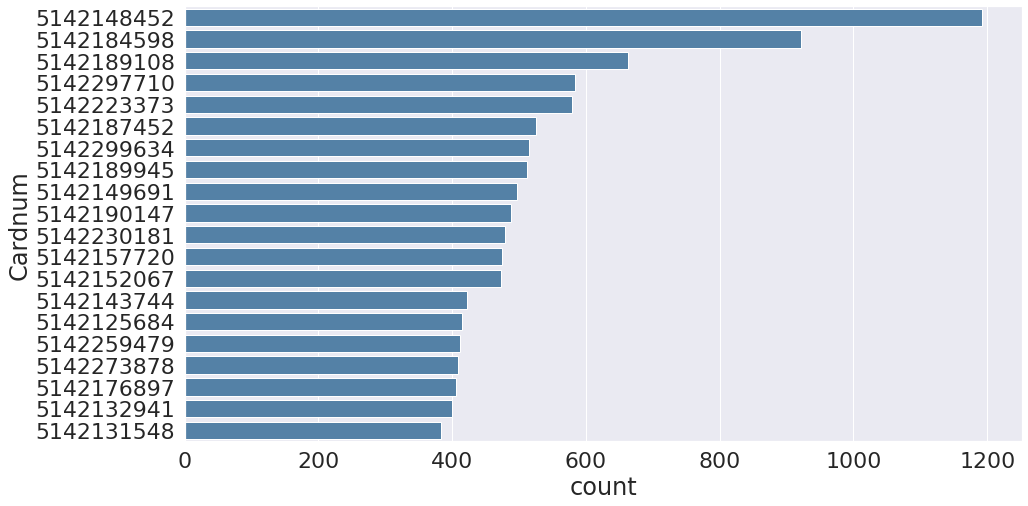

In [254]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
#plt.xticks(rotation=90)
plot = sns.countplot(y='Cardnum', data = mydata, order = mydata['Cardnum'].value_counts().head(20).index, color = "steelblue")

In [281]:
print("Cardnum", mydata['Cardnum'].value_counts().head(1).index[0], 
      "has a count of", mydata['Cardnum'].value_counts().head(1).iloc[0],
      ", which is", round((mydata['Cardnum'].value_counts().head(1).iloc[0] / mydata['Cardnum'].count()) * 100, 2), "%",
      "of the entire data")

Cardnum 5142148452 has a count of 1192 , which is 1.23 % of the entire data


#### Field: Date

In [236]:
len(mydata['Date'].unique())

365

In [237]:
mydata['Date'].value_counts()

2/28/10     684
8/10/10     610
3/15/10     594
9/13/10     564
8/9/10      536
           ... 
2/20/10      11
10/3/10      10
1/16/10       9
10/17/10      6
12/26/10      6
Name: Date, Length: 365, dtype: int64

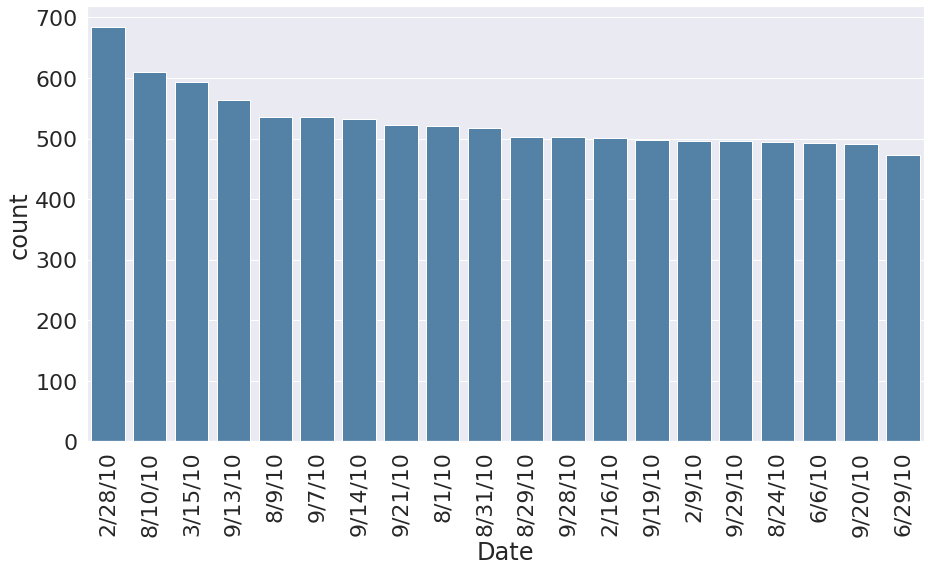

In [268]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plt.xticks(rotation=90)
plot = sns.countplot(x='Date', data = mydata, order = mydata['Date'].value_counts().head(20).index, color = "steelblue")

<AxesSubplot:title={'center':'Daily Transactions'}, xlabel='Date', ylabel='Count'>

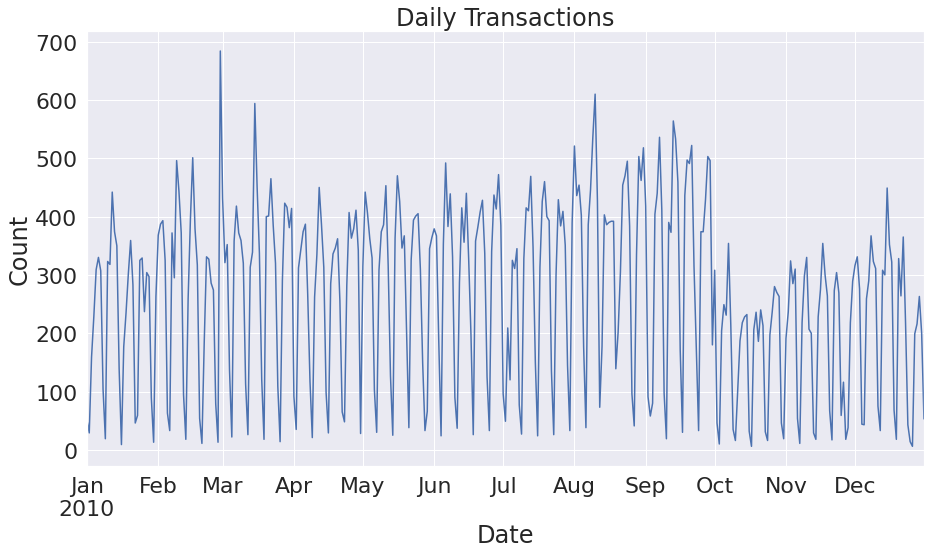

In [274]:
plt.rcParams["figure.figsize"] = [15,8]
mydata_Date = mydata.assign(trx = np.ones(numrecords)).set_index(mydata['Date'])
mydata_Date.index = pd.to_datetime(mydata_Date.index)
mydata_Date.resample(timedelta(days = 1)).count().trx.plot(title = "Daily Transactions", ylabel = 'Count')
#plt.ylabel("count", size = 25)

<AxesSubplot:title={'center':'Weekly Transactions'}, xlabel='Date', ylabel='Count'>

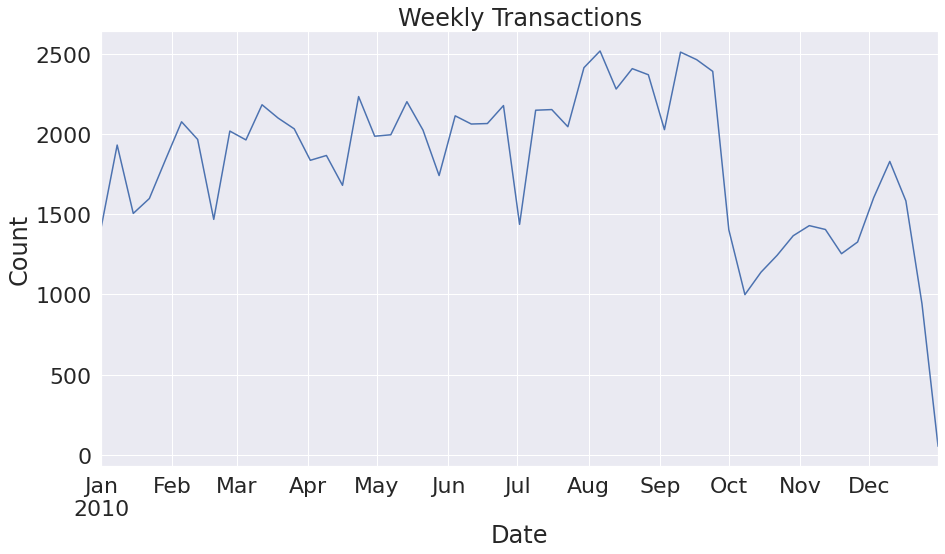

In [275]:
plt.rcParams["figure.figsize"] = [15,8]
mydata_Date = mydata.assign(trx = np.ones(numrecords)).set_index(mydata['Date'])
mydata_Date.index = pd.to_datetime(mydata_Date.index)
mydata_Date.resample(timedelta(days = 7)).count().trx.plot(title = "Weekly Transactions", ylabel = 'Count')

<AxesSubplot:title={'center':'Approximately Monthly Transactions'}, xlabel='Date', ylabel='Count'>

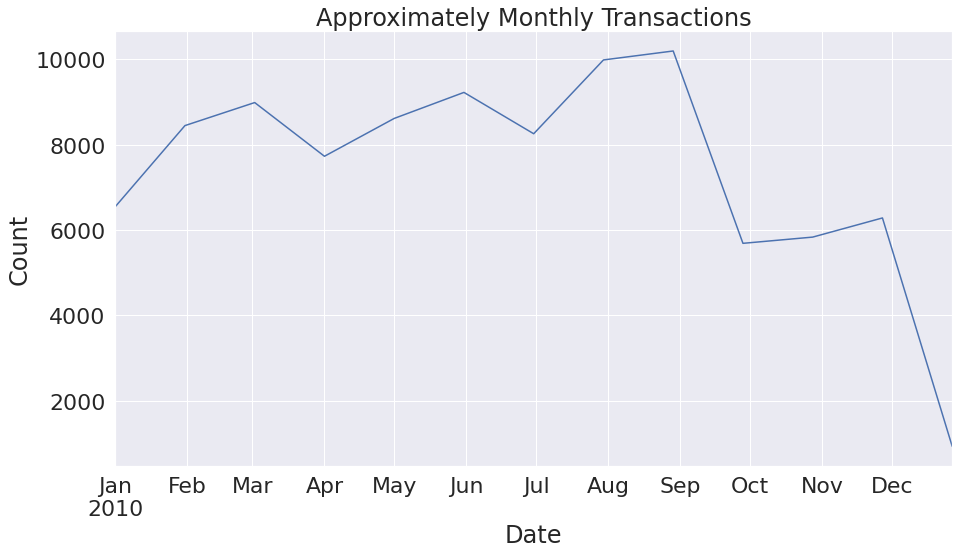

In [276]:
plt.rcParams["figure.figsize"] = [15,8]
mydata_Date = mydata.assign(trx = np.ones(numrecords)).set_index(mydata['Date'])
mydata_Date.index = pd.to_datetime(mydata_Date.index)
mydata_Date.resample(timedelta(days = 30)).count().trx.plot(title = "Approximately Monthly Transactions", ylabel = 'Count')

In [277]:
mydata_Date

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,trx
Date,,,,,,,,,,,
2010-01-01,1,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,1.0
2010-01-01,2,5142183973,1/1/10,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,1.0
2010-01-01,3,5142131721,1/1/10,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,1.0
2010-01-01,4,5142148452,1/1/10,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,1.0
2010-01-01,5,5142190439,1/1/10,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2010-12-31,96749,5142276053,12/31/10,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0,1.0
2010-12-31,96750,5142225701,12/31/10,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,1.0
2010-12-31,96751,5142226486,12/31/10,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0,1.0


#### Field: Merchnum

In [55]:
len(mydata['Merchnum'].unique())

13092

In [56]:
mydata['Cardnum'].value_counts()

5142148452    1192
5142184598     921
5142189108     663
5142297710     583
5142223373     579
              ... 
5142110002       1
5142306704       1
5142296479       1
5142246010       1
5142175806       1
Name: Cardnum, Length: 1645, dtype: int64

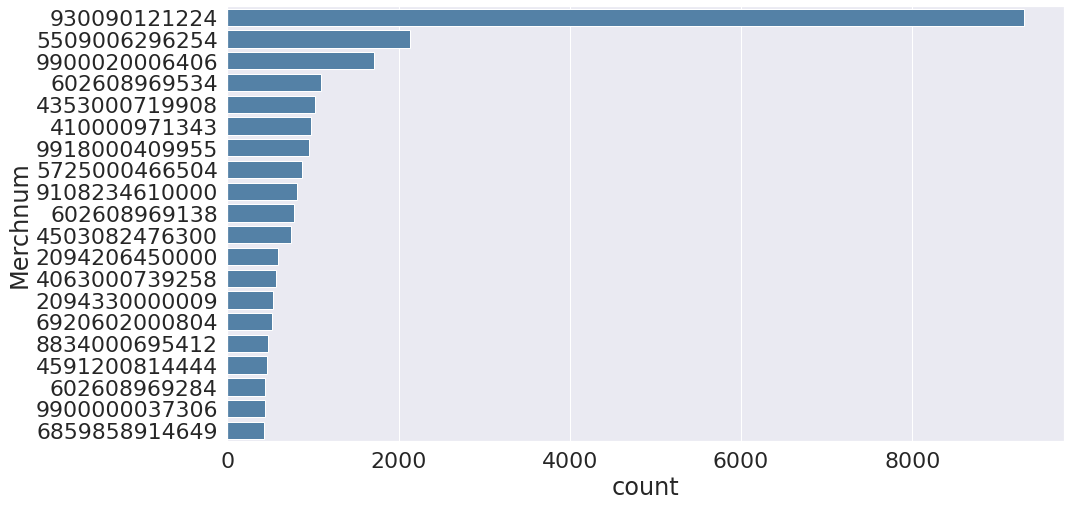

In [248]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
#plt.xticks(rotation=90)
plot = sns.countplot(y='Merchnum', data = mydata, order = mydata['Merchnum'].value_counts().head(20).index, color = "steelblue")

In [83]:
print("Merchnum", mydata['Merchnum'].value_counts().head(1).index[0], 
      "has a count of", mydata['Merchnum'].value_counts().head(1)[0],
      ", which is", round((mydata['Merchnum'].value_counts().head(1)[0] / mydata['Merchnum'].count()) * 100, 2), "%",
      "of the entire data")

Merchnum 930090121224 has a count of 9310 , which is 9.97 % of the entire data


#### Field: Merch description

In [86]:
len(mydata['Merch description'].unique())

13126

In [87]:
mydata['Merch description'].value_counts()

GSA-FSS-ADV                 1688
SIGMA-ALDRICH               1635
STAPLES #941                1174
FISHER SCI ATL              1093
MWI*MICRO WAREHOUSE          958
                            ... 
CONWAY'S TOURS/GRAY LI         1
CLASSIC CITY MOVING & ST       1
CELLULAR INSTALLATIONS         1
PEKINELMER.COM                 1
JOTO PAPER INC                 1
Name: Merch description, Length: 13126, dtype: int64

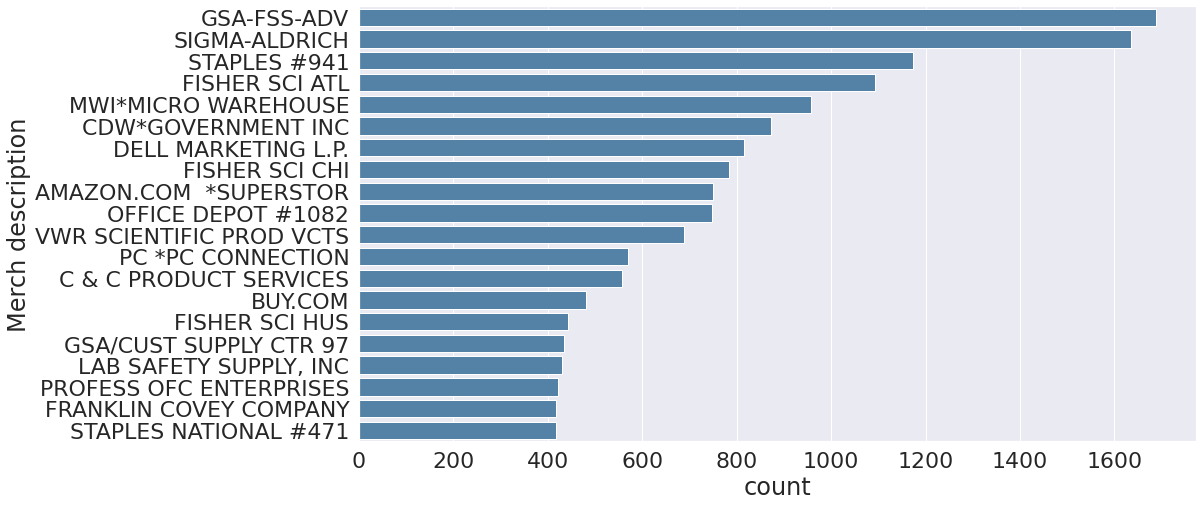

In [249]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
#plt.xticks(rotation=90)
plot = sns.countplot(y='Merch description', data = mydata, order = mydata['Merch description'].value_counts().head(20).index, color = "steelblue")

#### Field: Merch state

In [89]:
len(mydata['Merch state'].unique())

228

In [90]:
mydata['Merch state'].value_counts()

TN     12035
VA      7872
CA      6817
IL      6508
MD      5398
       ...  
334        1
338        1
925        1
060        1
480        1
Name: Merch state, Length: 227, dtype: int64

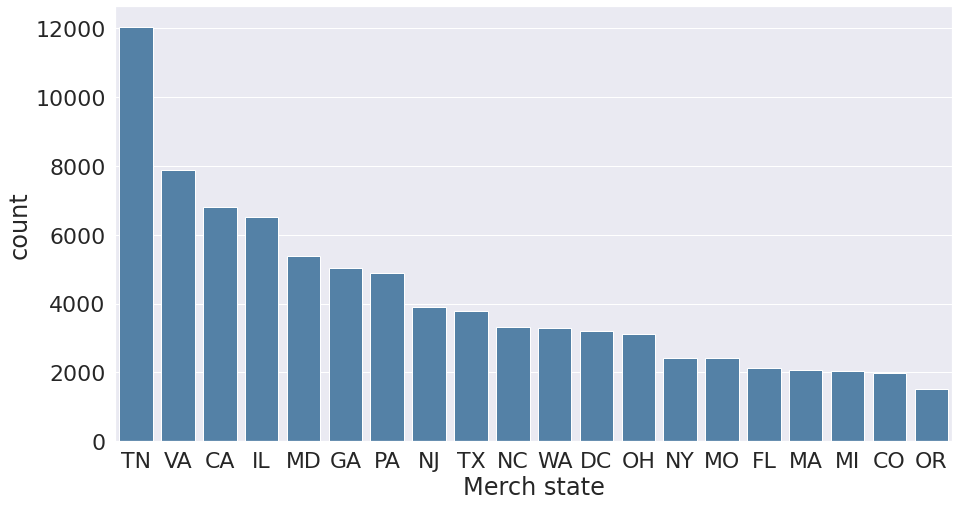

In [250]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
#plt.xticks(rotation=90)
plot = sns.countplot(x='Merch state', data = mydata, order = mydata['Merch state'].value_counts().head(20).index, color = "steelblue")

In [99]:
print("Merch state", mydata['Merch state'].value_counts().head(1).index[0], 
      "has a count of", mydata['Merch state'].value_counts().head(1)[0],
      ", which is", round((mydata['Merch state'].value_counts().head(1)[0] / mydata['Merch state'].count()) * 100, 2), "%",
      "of the entire data")

Merch state TN has a count of 12035 , which is 12.59 % of the entire data


#### Field: Merch zip

In [93]:
len(mydata['Merch zip'].unique())

4568

In [95]:
mydata['Merch zip'].value_counts()

38118.0    11868
63103.0     1650
8701.0      1267
22202.0     1250
60061.0     1221
           ...  
52806.0        1
60466.0        1
77338.0        1
44039.0        1
34218.0        1
Name: Merch zip, Length: 4567, dtype: int64

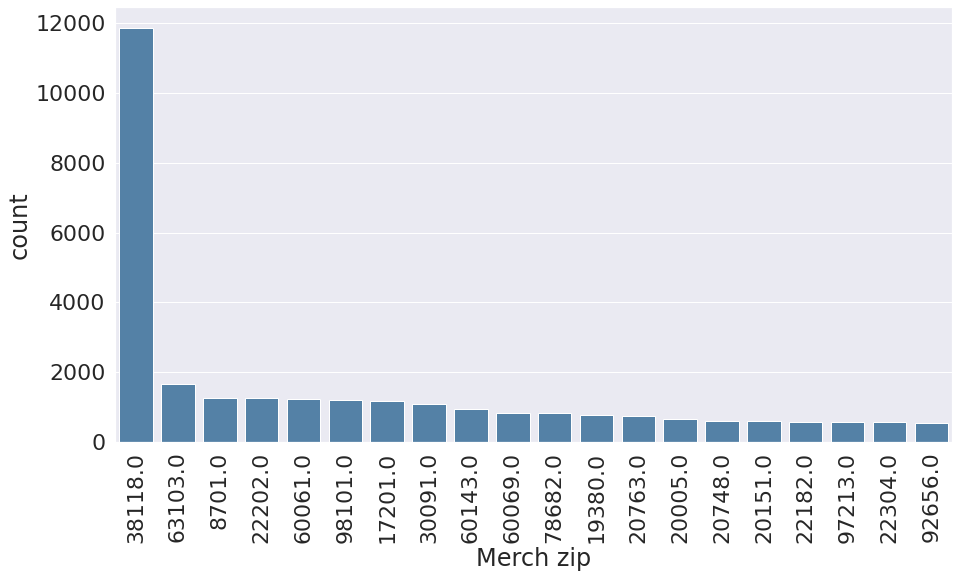

In [252]:
plt.rcParams["figure.figsize"] = [15,8]
sns.set(font_scale=2)
plt.xticks(rotation=90)
plot = sns.countplot(x='Merch zip', data = mydata, order = mydata['Merch zip'].value_counts().head(20).index, color = "steelblue")

In [157]:
print("Merch zip", mydata['Merch zip'].value_counts().head(1).index[0], 
      "has a count of", mydata['Merch zip'].value_counts().head(1).iloc[0],
      ", which is", round((mydata['Merch zip'].value_counts().head(1).iloc[0] / mydata['Merch zip'].count()) * 100, 2), "%",
      "of the entire data")

Merch zip 38118.0 has a count of 11868 , which is 12.89 % of the entire data


#### Field: Transtype

In [131]:
len(mydata['Transtype'].unique())

4

In [133]:
mydata['Transtype'].value_counts()

P    96398
A      181
D      173
Y        1
Name: Transtype, dtype: int64

Text(0, 0.5, 'Log scale of count')

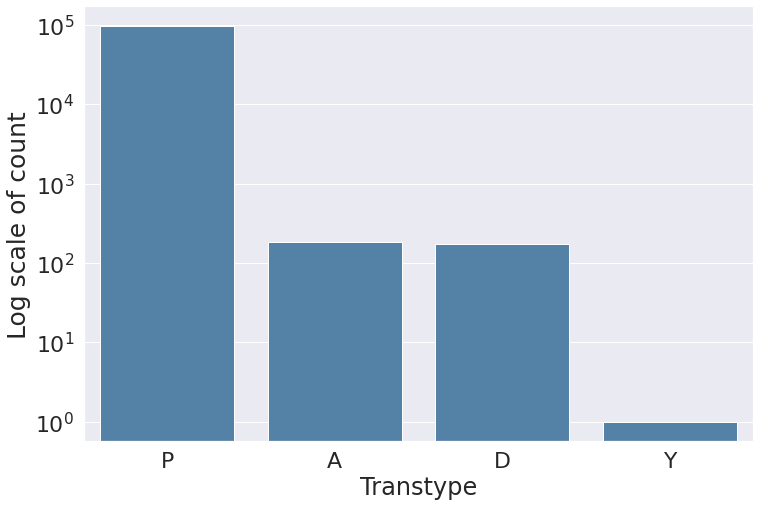

In [139]:
plt.rcParams["figure.figsize"] = [12,8]
sns.set(font_scale=2)
plot = sns.countplot(x='Transtype', data = mydata, order = mydata['Transtype'].value_counts().index, color = "steelblue")
plot.set_yscale('log')
plt.ylabel("Log scale of count", size = 25)

In [140]:
print("Transtype", mydata['Transtype'].value_counts().head(1).index[0], 
      "has a count of", mydata['Transtype'].value_counts().head(1)[0],
      ", which is", round((mydata['Transtype'].value_counts().head(1)[0] / mydata['Transtype'].count()) * 100, 2), "%",
      "of the entire data")

Transtype P has a count of 96398 , which is 99.63 % of the entire data


#### Field: Amount

<AxesSubplot:xlabel='Amount'>

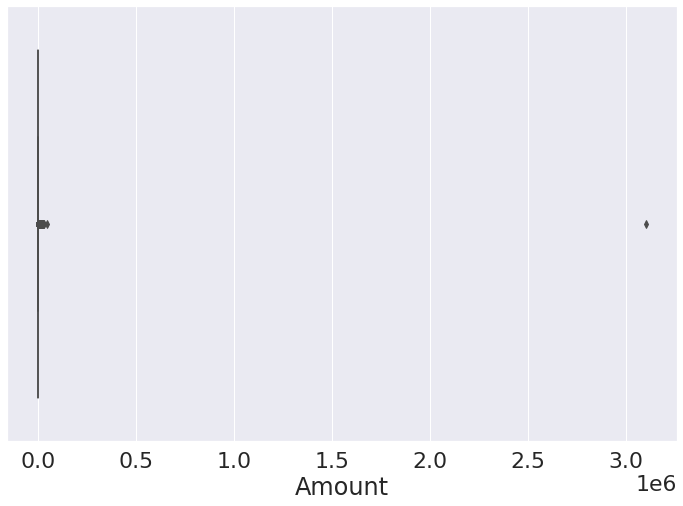

In [159]:
sns.boxplot(x='Amount', data=mydata)

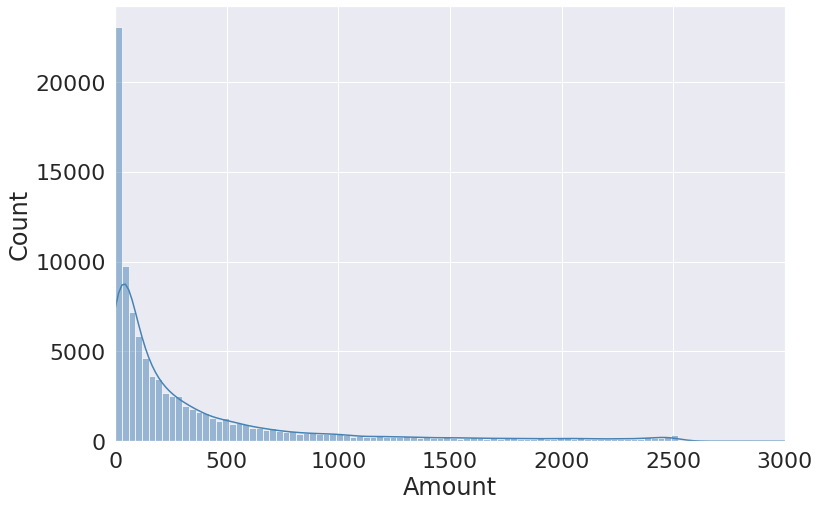

In [181]:
# exclude outliers higher than 3000
xhigh = 3000
plt.xlim(0, xhigh)
temp = mydata[mydata['Amount'] <= xhigh]
plot = sns.histplot(x='Amount', data = temp, bins = 100, color = "steelblue", kde = True)

In [210]:
xhigh = 3000
temp = mydata[mydata['Amount'] <= xhigh]
print("The distribution plot is", round(len(temp) / len(mydata) * 100, 2), "% populated after excluding outliers more than", xhigh)

The distribution plot is 99.33 % populated after excluding outliers more than 3000


In [209]:
temp = mydata[mydata['Amount'] < 50]
print(round(len(temp) / len(mydata) * 100, 2), "% of the amount is lower than 50")

30.67 % of the amount is lower than 50


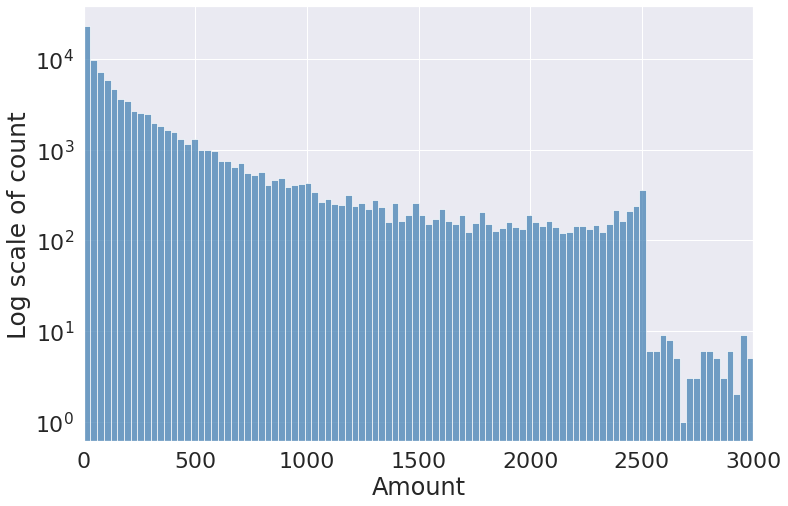

In [183]:
# exclude outliers higher than 3000
xhigh = 3000
plt.xlim(0, xhigh)
plt.ylabel("Log scale of count", size = 25)
temp = mydata[mydata['Amount'] <= xhigh]
plot = sns.histplot(x='Amount', data = temp, bins = 100, color = "steelblue")
plot.set_yscale('log')

#### Field: Fraud

In [141]:
len(mydata['Fraud'].unique())

2

In [143]:
mydata['Fraud'].value_counts()

0    95694
1     1059
Name: Fraud, dtype: int64

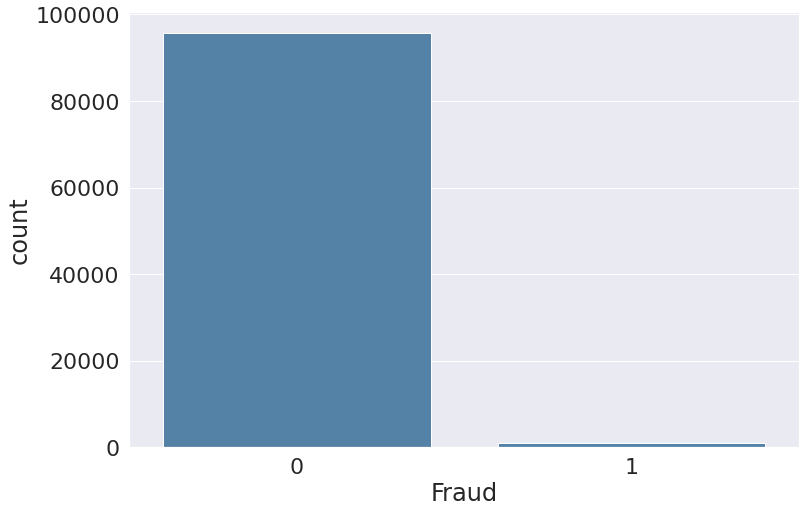

In [148]:
plt.rcParams["figure.figsize"] = [12,8]
sns.set(font_scale=2)
plot = sns.countplot(x='Fraud', data = mydata, order = mydata['Fraud'].value_counts().index, color = "steelblue")
#plot.set_yscale('log')
#plt.ylabel("Log scale of count", size = 25)

Text(0, 0.5, 'Log scale of count')

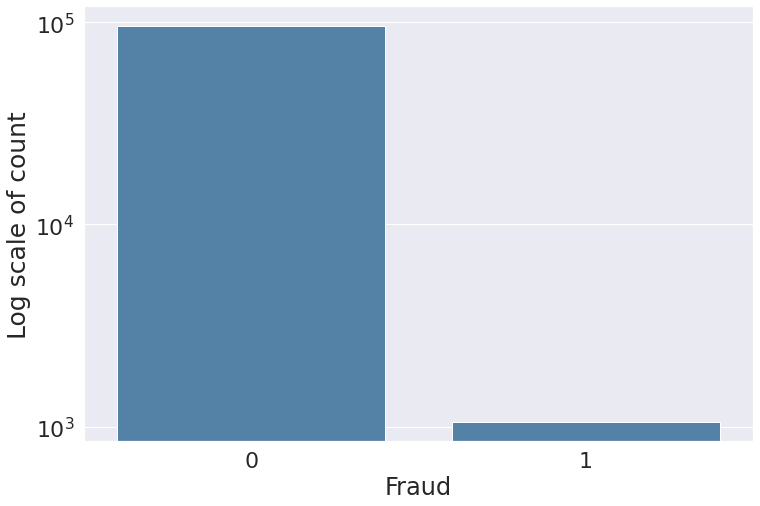

In [158]:
plt.rcParams["figure.figsize"] = [12,8]
sns.set(font_scale=2)
plot = sns.countplot(x='Fraud', data = mydata, order = mydata['Fraud'].value_counts().index, color = "steelblue")
plot.set_yscale('log')
plt.ylabel("Log scale of count", size = 25)

In [149]:
print("Fraud", mydata['Fraud'].value_counts().head(1).index[0], 
      "has a count of", mydata['Fraud'].value_counts().head(1)[0],
      ", which is", round((mydata['Fraud'].value_counts().head(1)[0] / mydata['Fraud'].count()) * 100, 2), "%",
      "of the entire data")

Fraud 0 has a count of 95694 , which is 98.91 % of the entire data


In [278]:
print("Fraud", mydata['Fraud'].value_counts().tail(1).index[0], 
      "has a count of", mydata['Fraud'].value_counts().tail(1).iloc[0],
      ", which is", round((mydata['Fraud'].value_counts().tail(1).iloc[0] / mydata['Fraud'].count()) * 100, 2), "%",
      "of the entire data")

Fraud 1 has a count of 1059 , which is 1.09 % of the entire data
